In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import glob
import os
import datetime
from datetime import timedelta, datetime
import scipy
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import io
%matplotlib inline
import timeit
from timeit import default_timer as timer
from matplotlib import pyplot
from matplotlib.pylab import rcParams
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from functools import reduce
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
cd C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul\Anomaly Detection

C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul\Anomaly Detection


In [7]:
colnames = ["VDS_ID","Lane Count","Loop Count"]

for i in range(1,11):
    colnames.append('Loop_{}_FLOW'.format(i))
    colnames.append('Loop_{}_Occupancy'.format(i))
    colnames.append('Loop_{}_status'.format(i))

health_data_day2 = pd.read_csv('Good_Data_30thSept.csv',sep = ',')
health_data_US101S_day2 = health_data_day2.loc[health_data_day2['Fwy'] == 'US101-S']
health_data_US101S_day2 = health_data_US101S_day2.drop_duplicates(subset=['VDS'],keep = 'last')
health_data_US101S_day2 = health_data_US101S_day2.reset_index(drop = True)
li_lstm = []
li_groups = []
li_complete_groups = []
day2 = pd.DataFrame()
def pre_processing_lstm(day):
    global li_lstm
    global li_groups
    global li_complete_groups
    global day2 
    path = r'C:\Users\desh669\OneDrive - PNNL\Documents\Python Scripts\Mobility Rahul\\' + day + '\\'
    
    all_files = glob.glob(path + "/*.txt")
    for filename in all_files:
        #if  int(filename[-10:-8]) >= 5 and int(filename[-10:-8]) <=21:        
        df = pd.read_csv(filename,index_col = None, delimiter = ",",names = colnames ,skiprows = 1)
        df= df.drop(['Lane Count','Loop Count','Loop_1_status','Loop_8_status','Loop_2_status','Loop_3_status',
                         'Loop_4_status','Loop_5_status','Loop_6_status','Loop_7_status','Loop_8_status','Loop_9_status',
                         'Loop_10_status'],axis = 1)
        df['time'] = datetime.strptime(str(int(filename[-18:-4])),'%Y%m%d%H%M%S')
        li_lstm.append(df)
    li_lstm = [df.loc[df['VDS_ID'].isin(health_data_US101S_day2.VDS.values)] for df in li_lstm]
    day2 = pd.concat(li_lstm)
    return day2

# start = timer()
# pre_processing_lstm('20190929')
# end = timer()
# print(end-start)

print(day1.shape)



start = timer()
pre_processing_lstm('20190930')
end = timer()
print(end-start)

day2.shape

(235624, 22)
35.803938921999986


(236182, 22)

In [24]:
day2.head(15)

VDS_ID  Loop_1_FLOW  Loop_1_Occupancy  Loop_2_FLOW  Loop_2_Occupancy  \
131  716328          7.0            0.0489         10.0            0.0756   
133  716331         11.0            0.0756         13.0            0.1067   
141  716339          2.0            0.0122          9.0            0.0567   
181  716390          1.0            0.0067          3.0            0.0178   
182  716391          1.0            0.0078          3.0            0.0200   
183  716392          0.0            0.0000          2.0            0.0133   
499  717446         12.0            0.0856         11.0            0.0722   
501  717450          9.0            0.0633         14.0            0.0978   
504  717453          2.0            0.0122          6.0            0.0389   
506  717458          7.0            0.0411         10.0            0.0667   
508  717462          9.0            0.0567         14.0            0.0989   
511  717466          4.0            0.0256          6.0            0.0467   
513  717468          7.0            0.0522          5.0            0.0367   
516  717472          5.0            0.0344          8.0            0.0411   
518  717479          3.0            0.0200          8.0            0.0589   

     Loop_3_FLOW  Loop_3_Occupancy  Loop_4_FLOW  Loop_4_Occupancy  \
131          8.0            0.0556         11.0            0.0900   
133         13.0            0.1122         11.0            0.1067   
141          6.0            0.0378         11.0            0.0644   
181          2.0            0.0156          2.0            0.0611   
182          2.0            0.0144          1.0            0.0067   
183          3.0            0.0222          2.0            0.0333   
499         12.0            0.0944         11.0            0.0722   
501          9.0            0.1044         10.0            0.1089   
504         11.0            0.0933          6.0            0.0644   
506          5.0            0.0378          8.0            0.0667   
508         12.0            0.0889          7.0            0.0800   
511          2.0            0.0144          8.0            0.0700   
513          6.0            0.0389          7.0            0.0511   
516          4.0            0.0300          7.0            0.0467   
518         11.0            0.0811          7.0            0.0489   

     Loop_5_FLOW  ...  Loop_6_Occupancy  Loop_7_FLOW  Loop_7_Occupancy  \
131          NaN  ...               NaN          NaN               NaN   
133          NaN  ...               NaN          NaN               NaN   
141          NaN  ...               NaN          NaN               NaN   
181          NaN  ...               NaN          NaN               NaN   
182          NaN  ...               NaN          NaN               NaN   
183          NaN  ...               NaN          NaN               NaN   
499          NaN  ...               NaN          NaN               NaN   
501          NaN  ...               NaN          NaN               NaN   
504          NaN  ...               NaN          NaN               NaN   
506          NaN  ...               NaN          NaN               NaN   
508          NaN  ...               NaN          NaN               NaN   
511          NaN  ...               NaN          NaN               NaN   
513          NaN  ...               NaN          NaN               NaN   
516          NaN  ...               NaN          NaN               NaN   
518          NaN  ...               NaN          NaN               NaN   

     Loop_8_FLOW  Loop_8_Occupancy  Loop_9_FLOW  Loop_9_Occupancy  \
131          NaN               NaN          NaN               NaN   
133          NaN               NaN          NaN               NaN   
141          NaN               NaN          NaN               NaN   
181          NaN               NaN          NaN               NaN   
182          NaN               NaN          NaN               NaN   
183          NaN               NaN          NaN               NaN   

In [28]:
i = int(input())

lstm_data_day1 = day1.loc[day1['VDS_ID']==i]
lstm_data_day1 = lstm_data_day1.set_index('time')
lstm_data_day1 = lstm_data_day1[['Loop_1_FLOW']]

lstm_data_day2 = day2.loc[day2['VDS_ID']==i]
lstm_data_day2 = lstm_data_day2.set_index('time')
lstm_data_day2 = lstm_data_day2[['Loop_1_FLOW']]

print(lstm_data_day1.head())
print(lstm_data_day2.head())

lstm_data = pd.concat([lstm_data_day1,lstm_data_day2])
print(lstm_data.head())

717462
                     Loop_1_FLOW
time                            
2019-09-29 00:00:00          1.0
2019-09-29 00:00:30          8.0
2019-09-29 00:01:00          2.0
2019-09-29 00:01:30          4.0
2019-09-29 00:02:00          6.0
                     Loop_1_FLOW
time                            
2019-09-30 00:00:00          9.0
2019-09-30 00:00:30          0.0
2019-09-30 00:01:00          7.0
2019-09-30 00:01:30          2.0
2019-09-30 00:02:00          6.0
                     Loop_1_FLOW
time                            
2019-09-29 00:00:00          1.0
2019-09-29 00:00:30          8.0
2019-09-29 00:01:00          2.0
2019-09-29 00:01:30          4.0
2019-09-29 00:02:00          6.0


In [35]:
start = timer()
### Training sets
train = lstm_data.values[0:4000,:]
valid = lstm_data.values[4000:,:]

print(train.shape)
print(valid.shape)

### Scaling between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(lstm_data.values)

### Splits & Creating a data-structure with 60 timesteps and 1 output
x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
    
### Converting lists to array
x_train, y_train = np.array(x_train), np.array(y_train)

### Reshaping to get the required input shape (3D tensor with shape (batch size,timesteps,input_dim))
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# # create and fit the LSTM network

# ## Initializing the RNN
model = Sequential()

# ## Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))

# ## Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# ## Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# ## Adding a Fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units=50))
# model.add(Dropout(0.2))

# ## Adding the output layer
model.add(Dense(1))

# ## Compiling the RNN
model.compile(loss='mean_squared_error', optimizer='adam')

# ### Fitting the RNN to the training set
model.fit(x_train, y_train, epochs=5, batch_size=30, verbose=2)

### Creating a data structure for test data
inputs = lstm_data[len(lstm_data) - len(valid) - 30:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
traffic_flow = model.predict(X_test)
traffic_flow = scaler.inverse_transform(traffic_flow)

print(timer()-start)

(4000, 1)
(1697, 1)
Epoch 1/5
 - 13s - loss: 0.0161
Epoch 2/5
 - 7s - loss: 0.0125
Epoch 3/5
 - 8s - loss: 0.0124
Epoch 4/5
 - 7s - loss: 0.0121
Epoch 5/5
 - 8s - loss: 0.0120
48.702221307999935


In [19]:
cd C:\Users\desh669\OneDrive - PNNL\Documents\Rahul Important\Results of analysis

C:\Users\desh669\OneDrive - PNNL\Documents\Rahul Important\Results of analysis


2.5563114848518635


C:\Users\desh669\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


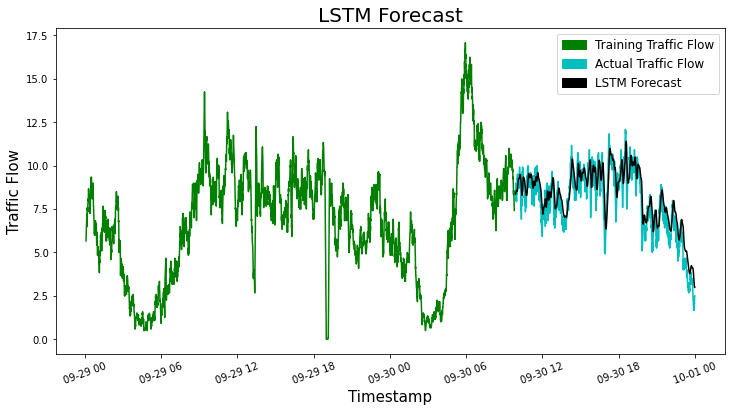

In [36]:
rms=np.sqrt(np.mean(np.power((valid-traffic_flow),2)))
print(rms)

plt.close()
train = lstm_data[:4000]
valid = lstm_data[4000:]
valid['Predictions'] = traffic_flow
#valid['N_pred'] = Neighbors_average
pyplot.figure(figsize=(12,6))
plt.plot(train['Loop_1_FLOW'].rolling(12).mean(),'g-')
plt.plot(valid['Loop_1_FLOW'].rolling(12).mean(),'c-')
plt.plot(valid['Predictions'].rolling(12).mean(),'k-')
#plt.plot(valid['N_pred'].rolling(12).mean(),'r-')
plt.title('LSTM Forecast',fontsize = 20)
plt.xlabel('Timestamp',fontsize = 15)
plt.ylabel('Traffic Flow',fontsize =15)
plt.xticks(rotation = 20)
green_patch = mpatches.Patch(color='green', label='Training Traffic Flow')
blue_patch = mpatches.Patch(color='c', label='Actual Traffic Flow')
orange_patch = mpatches.Patch(color='k', label='LSTM Forecast')
#red_patch = mpatches.Patch(color='r', label='LSTM Forecast_With_Neighbors')
plt.legend(handles = [green_patch,blue_patch,orange_patch],fontsize = 12)
#plt.savefig('LSTM_More_Training_4.png')

In [ ]:
### This is for getting the data of the neighbors and inner joining them to one dataframe
# Corrupt = data_lstm_all_loops.loc[data_lstm_all_loops['VDS_ID']==717446]
# Corrupt = Corrupt.set_index('time')
# Corrupt = Corrupt[['Loop_2_FLOW']]

# N1 = data_lstm_all_loops.loc[data_lstm_all_loops['VDS_ID']==717446]
# N1 = N1.set_index('time')
# N1 = N1[['Loop_1_FLOW']]

# N2 = data_lstm_all_loops.loc[data_lstm_all_loops['VDS_ID']==716331]
# N2 = N2.set_index('time')
# N2 = N2[['Loop_1_FLOW']]

# N3 = data_lstm_all_loops.loc[data_lstm_all_loops['VDS_ID']==717450]
# N3 = N3.set_index('time')
# N3 = N3[['Loop_1_FLOW']]

# N4 = data_lstm_all_loops.loc[data_lstm_all_loops['VDS_ID']==716331]
# N4 = N4.set_index('time')
# N4 = N4[['Loop_3_FLOW']]

# N5 = data_lstm_all_loops.loc[data_lstm_all_loops['VDS_ID']==716331]
# N5 = N5.set_index('time')
# N5 = N5[['Loop_2_FLOW']]

# Li_ = [Corrupt,N1,N2,N3,N4,N5]

# df_final = reduce(lambda left,right: pd.merge(left,right,on='time'), Li_)
# df_final.head()

In [ ]:
### Let us pick one of the loops for LSTM
dataset = df_final[['Loop_2_FLOW_x']]
#dataset = dataset.set_index('time')
#dataset = dataset.drop(dataset.columns[9:22],axis = 1)
#dataset = dataset.drop(['VDS_ID'],axis = 1)
dataset.head()

In [ ]:
# ### Let us see how the data looks like
# values = dataset.values
# groups = [0,1, 2, 3, 4, 5, 6, 7]
# i = 1
# pyplot.figure(figsize=(15,15))
# for group in groups:
#     pyplot.subplot(len(groups),1, i)
#     pyplot.plot(dataset.index,values[:, group])
#     #pyplot.plot(dataset.index,np.roll(values[:, group]))
#     pyplot.title(dataset.columns[group], y=0.6, loc='right')
#     pyplot.grid()
#     i += 1
# pyplot.show()

In [ ]:
univariate_data = pd.DataFrame(index = dataset.index, data = dataset.Loop_2_FLOW_x)
len(univariate_data)

In [ ]:
### Training sets
train = univariate_data.values[0:600,:]
valid = univariate_data.values[600:,:]

print(train.shape)
print(valid.shape)

### Scaling between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(univariate_data.values)

### Splits & Creating a data-structure with 60 timesteps and 1 output
x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
    
### Converting lists to array
x_train, y_train = np.array(x_train), np.array(y_train)

### Reshaping to get the required input shape (3D tensor with shape (batch size,timesteps,input_dim))
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
# # create and fit the LSTM network

# ## Initializing the RNN
model = Sequential()

# ## Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))

# ## Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# ## Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# ## Adding a Fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units=50))
# model.add(Dropout(0.2))

# ## Adding the output layer
model.add(Dense(1))

# ## Compiling the RNN
model.compile(loss='mean_squared_error', optimizer='adam')

# ### Fitting the RNN to the training set
model.fit(x_train, y_train, epochs=5, batch_size=30, verbose=2)

In [ ]:
### Creating a data structure for test data
inputs = univariate_data[len(univariate_data) - len(valid) - 30:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
traffic_flow = model.predict(X_test)
traffic_flow = scaler.inverse_transform(traffic_flow)

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-traffic_flow),2)))
rms

In [ ]:
y = df_final.columns[1:]
li_Neighbors = []
for col in y:
    N = df_final[col].values[600:]
    li_Neighbors.append(N)

li_Neighbors.append(traffic_flow.flatten())
li_Neighbors
len(li_Neighbors)

In [ ]:
Neighbors_average = (li_Neighbors[0] +li_Neighbors[1] + li_Neighbors[2] + li_Neighbors[3] + li_Neighbors[4]
                     + li_Neighbors[5])/6

In [ ]:
cd C:\Users\desh669\OneDrive - PNNL\Documents\Rahul Important\Results of analysis

In [ ]:
plt.close()
train = univariate_data[:600]
valid = univariate_data[600:]
valid['Predictions'] = traffic_flow
valid['N_pred'] = Neighbors_average
pyplot.figure(figsize=(12,6))
plt.plot(train['Loop_2_FLOW_x'].rolling(12).mean(),'g-')
plt.plot(valid['Loop_2_FLOW_x'].rolling(12).mean(),'c-')
plt.plot(valid['Predictions'].rolling(12).mean(),'b-')
plt.plot(valid['N_pred'].rolling(12).mean(),'r-')
plt.title('LSTM Forecast',fontsize = 20)
plt.xlabel('Timestamp',fontsize = 15)
plt.ylabel('Traffic Flow',fontsize =15)
plt.xticks(rotation = 20)
green_patch = mpatches.Patch(color='green', label='Training Traffic Flow')
blue_patch = mpatches.Patch(color='c', label='Actual Traffic Flow')
orange_patch = mpatches.Patch(color='b', label='LSTM Forecast_Without_Neighbors')
red_patch = mpatches.Patch(color='r', label='LSTM Forecast_With_Neighbors')
plt.legend(handles = [green_patch,blue_patch,orange_patch,red_patch],fontsize = 12)
plt.savefig('LSTM_Mainline_avg_neighbors_4.png')

In [ ]:
# plt.close()
# train = univariate_data[:1500]
# valid = univariate_data[1500:]
# valid['Predictions'] = traffic_flow
# pyplot.figure(figsize=(12,6))
# plt.plot(train['Loop_1_FLOW'].rolling(12).mean(),'g-')
# plt.plot(valid['Loop_1_FLOW'].rolling(12).mean(),'c-')
# plt.plot(valid['Predictions'].rolling(12).mean(),'k-')
# plt.title('LSTM Forecast',fontsize = 20)
# plt.xlabel('Timestamp',fontsize = 15)
# plt.ylabel('Traffic Flow',fontsize =15)
# plt.xticks(rotation = 20)
# green_patch = mpatches.Patch(color='green', label='Training Data')
# blue_patch = mpatches.Patch(color='c', label='Testing Data')
# orange_patch = mpatches.Patch(color='k', label='LSTM Forecast')
# plt.legend(handles = [green_patch,blue_patch,orange_patch],fontsize = 15)
# #plt.savefig('LSTM_Mainline_loop_4.png')

In [ ]:
### This is for getting the data of the neighbors and inner joining them to one dataframe
### This is for training the LSTM model with the help of data from the neighbors
Corrupt = data_lstm_all_loops.loc[data_lstm_all_loops['VDS_ID']==772597]
Corrupt = Corrupt.set_index('time')
Corrupt = Corrupt[['Loop_3_FLOW']]

N1 = data_lstm_all_loops.loc[data_lstm_all_loops['VDS_ID']==772597]
N1 = N1.set_index('time')
N1 = N1[['Loop_2_FLOW']]

N2 = data_lstm_all_loops.loc[data_lstm_all_loops['VDS_ID']==772597]
N2 = N2.set_index('time')
N2 = N2[['Loop_4_FLOW']]

N3 = data_lstm_all_loops.loc[data_lstm_all_loops['VDS_ID']==772597]
N3 = N3.set_index('time')
N3 = N3[['Loop_1_FLOW']]

N4 = data_lstm_all_loops.loc[data_lstm_all_loops['VDS_ID']==717508]
N4 = N4.set_index('time')
N4 = N4[['Loop_3_FLOW']]

N5 = data_lstm_all_loops.loc[data_lstm_all_loops['VDS_ID']==717508]
N5 = N5.set_index('time')
N5 = N5[['Loop_2_FLOW']]

Li_ = [Corrupt,N1,N2,N3,N4,N5]

df_final = reduce(lambda left,right: pd.merge(left,right,on='time'), Li_)
df_final.head()

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()

    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    agg = pd.concat(cols, axis=1)
    agg.columns = names

    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
values = df_final.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [ ]:
reframed.head()

In [ ]:
# drop columns we don't want to predict
reframed.drop(reframed.columns[[7,8,9,10,11]], axis=1, inplace=True)
print(reframed.head())

In [ ]:
# split into train and test sets
values = reframed.values
n_train_periods = 600
train = values[:n_train_periods, :]
test = values[n_train_periods:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [ ]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:
plt.close()
# train = univariate_data[:600]
# valid = univariate_data[600:]
#valid['Predictions'] = inv_yhat
#valid['N_pred'] = Neighbors_average
pyplot.figure(figsize=(12,6))
#plt.plot(train['Loop_2_FLOW_x'].rolling(12).mean(),'g-')
df = pd.DataFrame()
# df['Actual'] = inv_y
# df['Forecast'] = inv_yhat
test_neighbors['Actual'] = inv_y
test_neighbors['Forecast'] = inv_yhat

plt.plot(train_neighbors['Loop_2_FLOW_x'].rolling(12).mean(),'g-')
plt.plot(train_neighbors['Loop_4_FLOW'].rolling(12).mean(),'g-')
plt.plot(train_neighbors['Loop_1_FLOW'].rolling(12).mean(),'g-')
plt.plot(train_neighbors['Loop_3_FLOW_y'].rolling(12).mean(),'g-')
plt.plot(train_neighbors['Loop_2_FLOW_y'].rolling(12).mean(),'g-')

plt.plot(train_neighbors['Loop_3_FLOW_x'].rolling(12).mean(),'c-')

plt.plot(test_neighbors['Actual'] .rolling(12).mean(),'c-')
plt.plot(test_neighbors['Forecast'].rolling(12).mean(),'r-')

# plt.plot(df['Actual'] .rolling(12).mean(),'c-')
# plt.plot(df['Forecast'].rolling(12).mean(),'b-')
# plt.plot(inv_yhat.rolling(12).mean(),'r-')
plt.title('LSTM Forecast',fontsize = 20)
plt.xlabel('Timestamp',fontsize = 15)
plt.ylabel('Traffic Flow',fontsize =15)
#plt.xticks(rotation = 20)
#green_patch = mpatches.Patch(color='green', label='Training Traffic Flow')
blue_patch = mpatches.Patch(color='c', label='Actual Traffic Flow')
orange_patch = mpatches.Patch(color='r', label='LSTM Forecast_With_Neighbors')
red_patch = mpatches.Patch(color='g', label='Training Traffic Flow')
plt.legend(handles = [blue_patch,orange_patch,red_patch],fontsize = 12)
plt.savefig('LSTM_Mainline_train_neighbors_1.png')

In [ ]:
train_neighbors = df_final[0:601]
train_neighbors.tail()

In [ ]:
test_neighbors = df_final[601:]
test_neighbors.head()

In [ ]:
test_neighbors.shape

In [ ]:
inv_yhat.shape